# Análisis económico de diciembre 2022

## Descarga

In [23]:
#Importar librerías.
import numpy as np
import pandas as pd
from limpiar import columnas_amarillo, columnas_verdes, columnas_fhv, dt_amarillo, dt_verdes, dt_fhv, nulos_amarillo, nulos_verdes, nulos_fhv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [24]:
#Diccionarios
d_amarillo = pd.read_pickle('datos_tlc/tlc_amarillos')
d_verde = pd.read_pickle('datos_tlc/tlc_verdes')
d_fhv = pd.read_pickle('datos_tlc/tlc_fhv')

In [25]:
#Descargar tablas de Diciembre de 2022.
exec(d_amarillo['yellow_2022_13'])
exec(d_verde['green_2022_13'])
exec(d_fhv['fhv_2022_13'])

In [26]:
#Limpiar taxis amarillos.
columnas_amarillo(yellow_2022_13)
dt_amarillo(yellow_2022_13)
nulos_amarillo(yellow_2022_13)

Se eliminaron las columnas: VendorID, RatecodeID store_and_fwd


In [27]:
#Limpiar taxis verdes.
columnas_verdes(green_2022_13)
dt_verdes(green_2022_13)
nulos_verdes(green_2022_13)

Se eliminaron las columnas: VendorID, store_and_fwd_flag, RatecodeID, ehail_fee


'Algo salió mal al tratar valores nulos.'

In [28]:
#Limpiar fhv.
columnas_fhv(fhv_2022_13)
dt_fhv(fhv_2022_13)
nulos_fhv(fhv_2022_13)

Se eliminaron las columnas: hvfhs_license_num, dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag


## 1. Tarifa por distancia.

In [29]:
#Tarifa por distancia base sin cargos adicionales.
yellow_2022_13['rate_per_mile'] = yellow_2022_13['fare_amount']/yellow_2022_13['trip_distance']
green_2022_13['rate_per_mile'] = yellow_2022_13['fare_amount']/yellow_2022_13['trip_distance']
fhv_2022_13['rate_per_mile'] = fhv_2022_13['base_passenger_fare']/fhv_2022_13['trip_miles']

In [30]:
yellow_2022_13

,pickup_day,pickup_time,dropoff_day,dropoff_time,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,rate_per_mile
0,2022-12-01,00:37:35,2022-12-01,00:47:35,1.0,2.00,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,4.250000
1,2022-12-01,00:34:35,2022-12-01,00:55:21,0.0,8.40,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,3.095238
2,2022-12-01,00:33:26,2022-12-01,00:37:34,1.0,0.80,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,6.250000
3,2022-12-01,00:45:51,2022-12-01,00:53:16,1.0,3.00,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,3.333333
4,2022-12-01,00:49:49,2022-12-01,00:54:13,1.0,0.76,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2022-12-31,23:46:00,2023-01-01,00:11:00,1.0,11.56,16,36,0,39.55,0.00,0.5,8.21,0.0,1.0,49.26,0.0,0.00,3.421280
3399545,2022-12-31,23:13:24,2022-12-31,23:29:08,1.0,5.06,75,50,0,26.23,0.00,0.5,0.00,0.0,1.0,30.23,0.0,0.00,5.183794
3399546,2022-12-31,23:00:49,2022-12-31,23:26:57,1.0,13.35,168,197,0,47.73,0.00,0.5,9.85,0.0,1.0,59.08,0.0,0.00,3.575281
3399547,2022-12-31,23:02:50,2022-12-31,23:16:05,1.0,0.00,238,116,0,12.74,0.00,0.5,0.00,0.0,1.0,16.74,0.0,0.00,inf


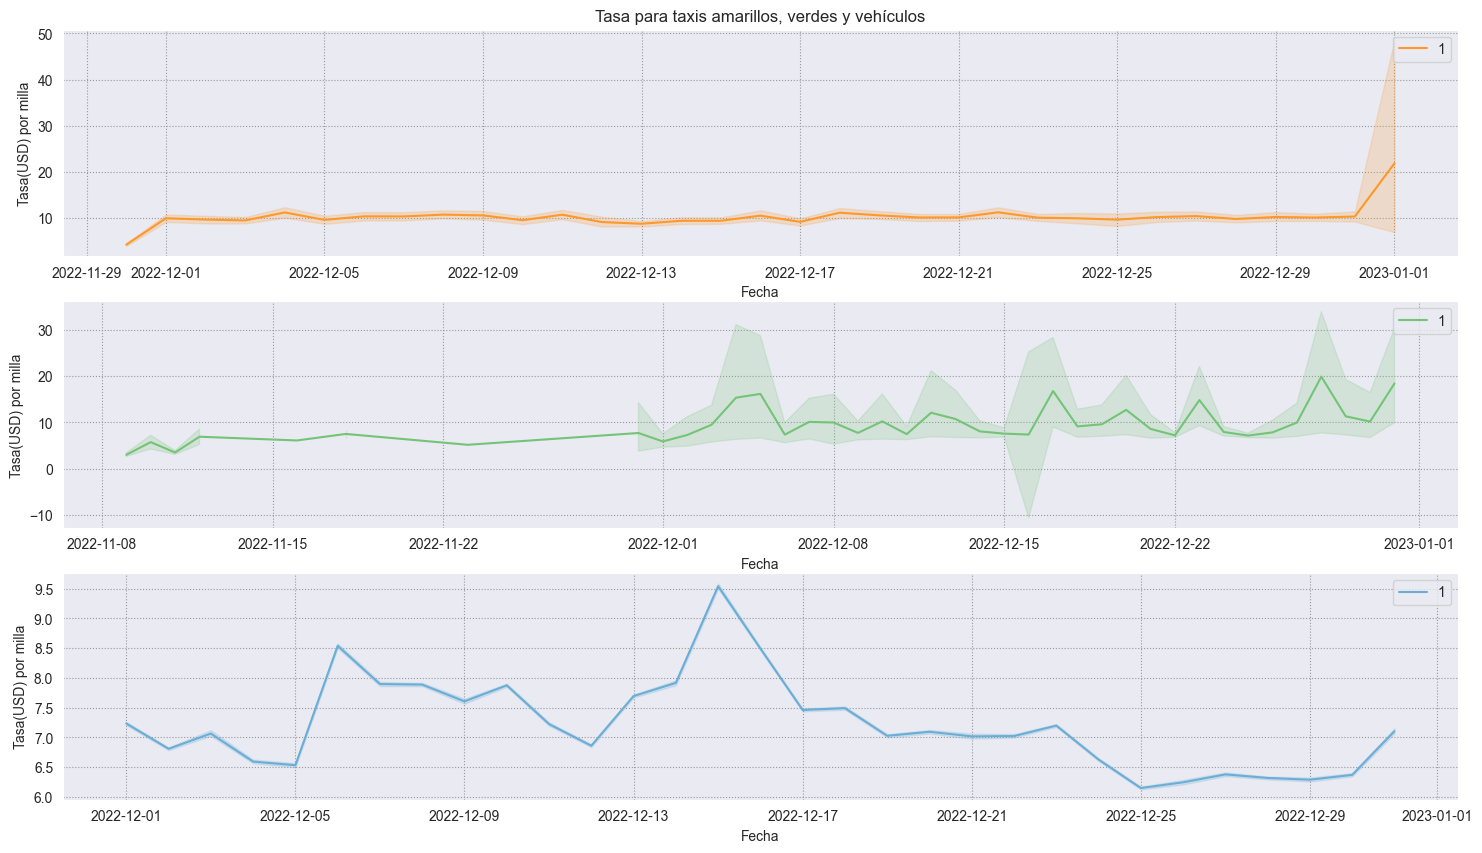

In [31]:
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})

fig, ax = plt.subplots(3, 1, figsize = (18, 10))
sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = yellow_2022_13,
    ax = ax[0],
    hue = 1,
    markers = True,
    palette = "YlOrBr"
)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Tasa(USD) por milla')
ax[0].set_title('Tasa para taxis amarillos, verdes y vehículos')

sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = green_2022_13,
    ax = ax[1],
    hue = 1,
    markers = True,
    palette = "Greens"
)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Tasa(USD) por milla')

sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = fhv_2022_13,
    ax = ax[2],
    hue = 1,
    markers = True,
    palette = "Blues"
)
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Tasa(USD) por milla')

plt.show()

In [32]:
#Tarifa por distancia total.
yellow_2022_13['total_per_mile'] = yellow_2022_13['total_amount']/yellow_2022_13['trip_distance']
green_2022_13['total_per_mile'] = yellow_2022_13['total_amount']/yellow_2022_13['trip_distance']
fhv_2022_13['total_amount'] = fhv_2022_13['base_passenger_fare'] + fhv_2022_13['tolls'] + fhv_2022_13['bcf'] + fhv_2022_13['sales_tax'] + fhv_2022_13['congestion_surcharge'] + fhv_2022_13['airport_fee'] + fhv_2022_13['tips']

In [33]:
fhv_2022_13['total_per_mile'] = fhv_2022_13['total_amount']/fhv_2022_13['trip_miles']

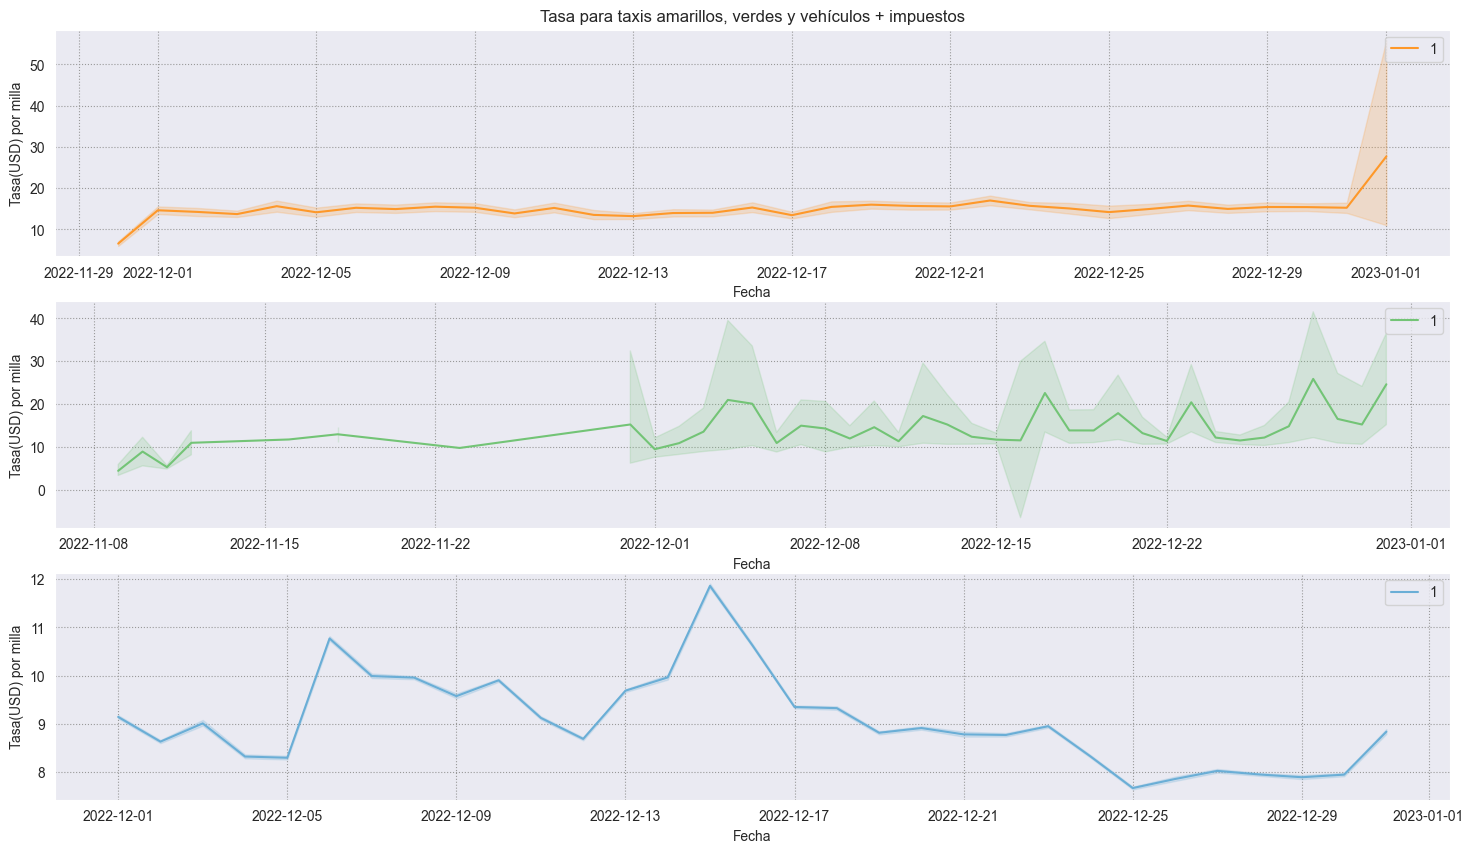

In [34]:
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})

fig, ax = plt.subplots(3, 1, figsize = (18, 10))
sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = yellow_2022_13,
    ax = ax[0],
    hue = 1,
    markers = True,
    palette = "YlOrBr"
)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Tasa(USD) por milla')
ax[0].set_title('Tasa para taxis amarillos, verdes y vehículos + impuestos')

sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = green_2022_13,
    ax = ax[1],
    hue = 1,
    markers = True,
    palette = "Greens"
)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Tasa(USD) por milla')


sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = fhv_2022_13,
    ax = ax[2],
    hue = 1,
    markers = True,
    palette = "Blues"
)
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Tasa(USD) por milla')


plt.show()

Es mínima la diferencia en la tendencia a primera vista.

## 2. Montos de viajes según origen/destino.

In [35]:
#Leer referencia de ubicación.
zona = pd.read_csv('datos_tlc/taxi_zone_lookup.csv')

In [36]:
#Agregar el dato de Borough a los dataframes para agrupar.

#Amarillos
yellow = yellow_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
yellow.rename(columns = {"Borough":"origin_borough"}, inplace = True)
yellow = yellow.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
yellow.rename(columns = {"Borough":"dest_borough"}, inplace = True)
#Verdes
green = green_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
green.rename(columns = {"Borough":"origin_borough"}, inplace = True)
green = green.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
green.rename(columns = {"Borough":"dest_borough"}, inplace = True)
#Renta
fhv = fhv_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
fhv.rename(columns = {"Borough":"origin_borough"}, inplace = True)
fhv = fhv.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
fhv.rename(columns = {"Borough":"dest_borough"}, inplace = True)

In [37]:
yellow['fare_amount'] = yellow['fare_amount'].abs()
yellow['total_amount'] = yellow['total_amount'].abs()

green['fare_amount'] = green['fare_amount'].abs()
green['total_amount'] = green['total_amount'].abs()

fhv['base_passenger_fare'] = fhv['base_passenger_fare'].abs()
fhv['total_amount'] = fhv['total_amount'].abs()

Según origen

In [38]:
y = yellow[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

In [39]:
g = green[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

In [40]:
f = fhv[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean()

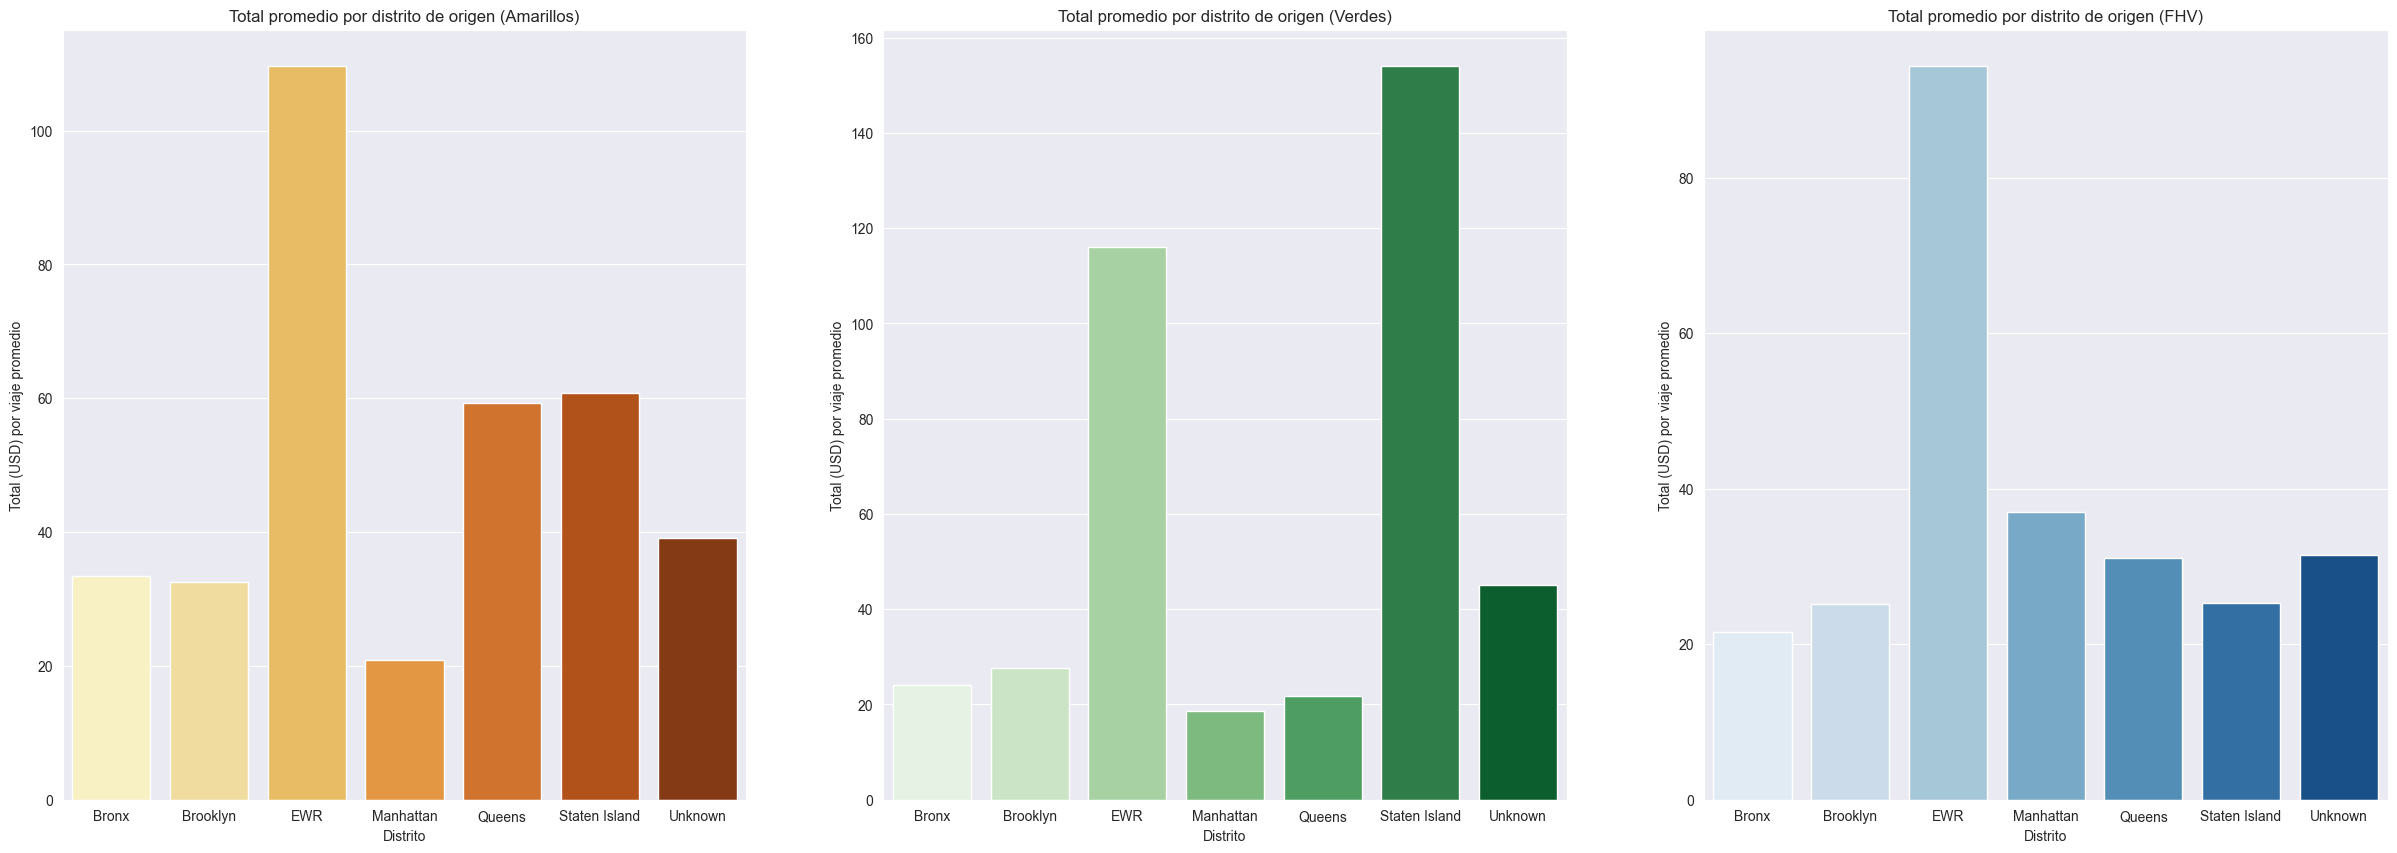

In [41]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.barplot(
    data = y,
    x = y.index,
    y = 'total_amount',
    ax = ax[0],
    palette = "YlOrBr"
)
ax[0].set_xlabel('Distrito')
ax[0].set_ylabel('Total (USD) por viaje promedio')
ax[0].set_title('Total promedio por distrito de origen (Amarillos)')

sns.barplot(
    data = g,
    x = y.index,
    y = 'total_amount', 
    ax = ax[1],
    palette = "Greens"
)
ax[1].set_xlabel('Distrito')
ax[1].set_ylabel('Total (USD) por viaje promedio')
ax[1].set_title('Total promedio por distrito de origen (Verdes)')

sns.barplot(
    data = f,
    x = y.index,
    y = 'total_amount',
    ax = ax[2],
    palette = "Blues"
)
ax[2].set_xlabel('Distrito')
ax[2].set_ylabel('Total (USD) por viaje promedio')
ax[2].set_title('Total promedio por distrito de origen (FHV)')

plt.show()

Según destino

In [171]:
y = yellow[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

In [172]:
g = green[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

In [173]:
f = fhv[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()

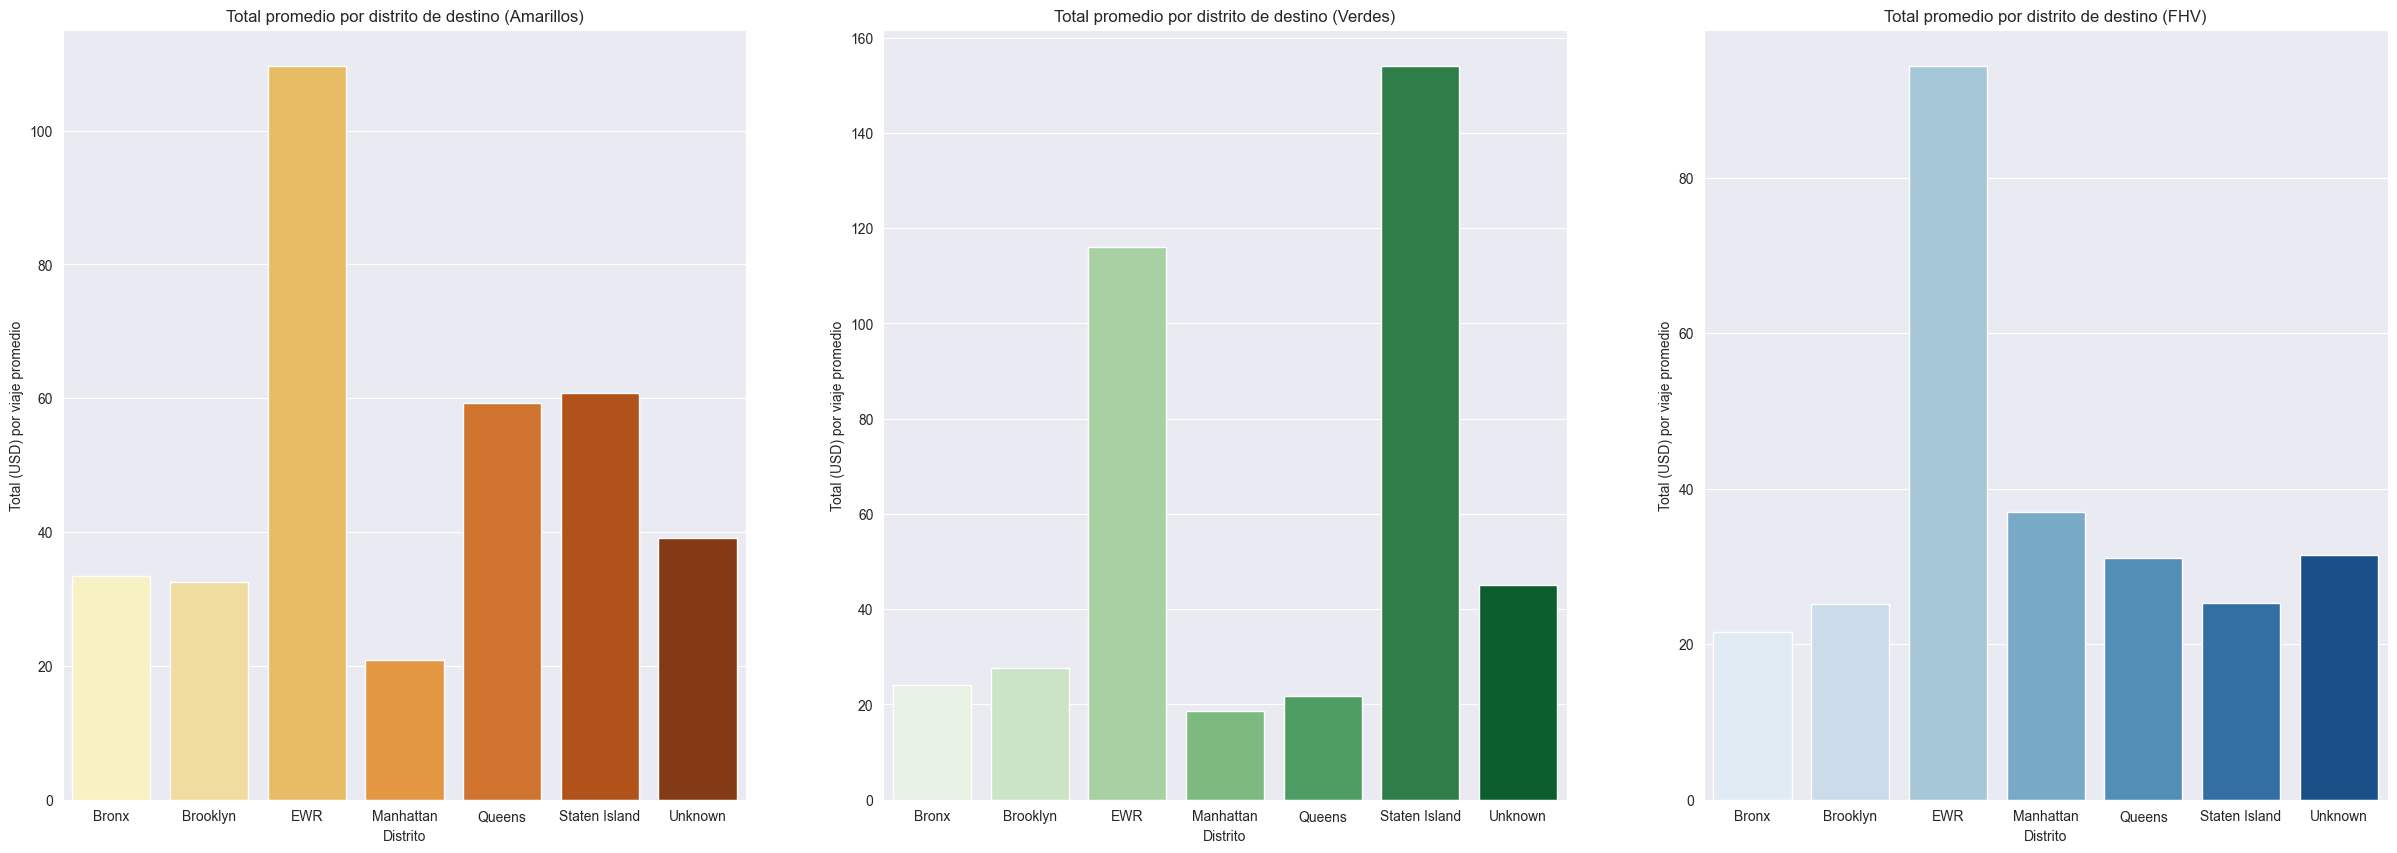

In [42]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.barplot(
    data = y,
    x = y.index,
    y = 'total_amount',
    ax = ax[0],
    palette = "YlOrBr"
)
ax[0].set_xlabel('Distrito')
ax[0].set_ylabel('Total (USD) por viaje promedio')
ax[0].set_title('Total promedio por distrito de destino (Amarillos)')

sns.barplot(
    data = g,
    x = y.index,
    y = 'total_amount', 
    ax = ax[1],
    palette = "Greens"
)
ax[1].set_xlabel('Distrito')
ax[1].set_ylabel('Total (USD) por viaje promedio')
ax[1].set_title('Total promedio por distrito de destino (Verdes)')

sns.barplot(
    data = f,
    x = y.index,
    y = 'total_amount',
    ax = ax[2],
    palette = "Blues"
)
ax[2].set_xlabel('Distrito')
ax[2].set_ylabel('Total (USD) por viaje promedio')
ax[2].set_title('Total promedio por distrito de destino (FHV)')
plt.show()

## 3. Demanda según día de la semana.

In [43]:
yellow_2022_13['pickup_day'] = pd.to_datetime(yellow_2022_13['pickup_day'])
green_2022_13['pickup_day'] = pd.to_datetime(green_2022_13['pickup_day'])
fhv_2022_13['pickup_day'] = pd.to_datetime(fhv_2022_13['pickup_day'])

In [44]:
yellow = yellow_2022_13.set_index('pickup_day')
green = green_2022_13.set_index('pickup_day')
fhv = fhv_2022_13.set_index('pickup_day')

In [46]:
y_por_semana = yellow[['fare_amount']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

g_por_semana = green[['fare_amount']].groupby(green.index.dayofweek).count()
g_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

f_por_semana = fhv[['base_passenger_fare']].groupby(fhv.index.dayofweek).count()
f_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

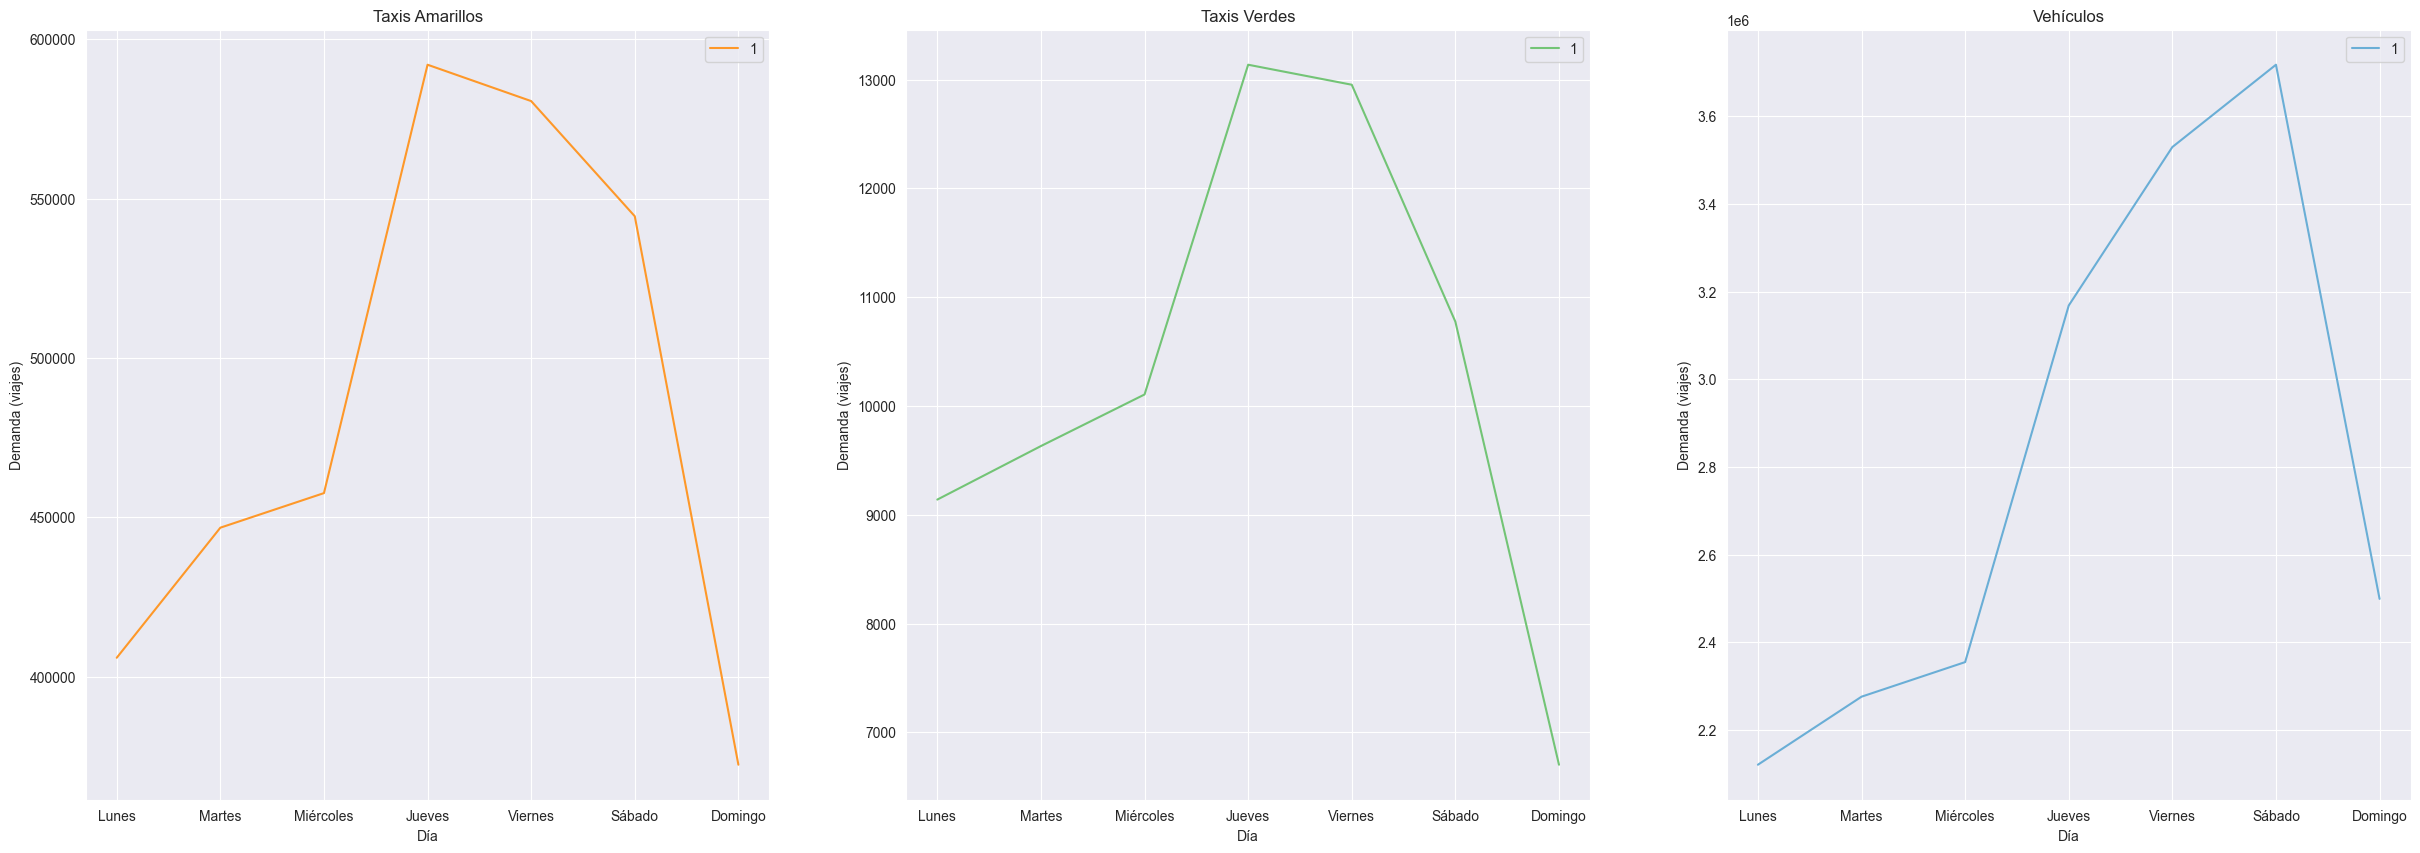

In [51]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.lineplot(
    x = y_por_semana.index,
    y = 'fare_amount',
    data = y_por_semana,
    ax = ax[0],
    hue = 1,
    palette = 'YlOrBr'
)
ax[0].set_xlabel('Día')
ax[0].set_ylabel('Demanda (viajes)')
ax[0].set_title('Taxis Amarillos')

sns.lineplot(
    x = g_por_semana.index,
    y = 'fare_amount',
    data = g_por_semana,
    ax = ax[1],
    hue = 1,
    palette = 'Greens'
)
ax[1].set_xlabel('Día')
ax[1].set_ylabel('Demanda (viajes)')
ax[1].set_title('Taxis Verdes')

sns.lineplot(
    x = f_por_semana.index,
    y = 'base_passenger_fare',
    data = f_por_semana,
    ax = ax[2],
    hue = 1,
    palette = 'Blues'
)
ax[2].set_xlabel('Día')
ax[2].set_ylabel('Demanda (viajes)')
ax[2].set_title('Vehículos')

plt.show()

## 4. Costo de viaje según día de la semana.

In [52]:
y_por_semana = yellow[['total_amount']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

g_por_semana = green[['total_amount']].groupby(green.index.dayofweek).count()
g_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

f_por_semana = fhv[['total_amount']].groupby(fhv.index.dayofweek).count()
f_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

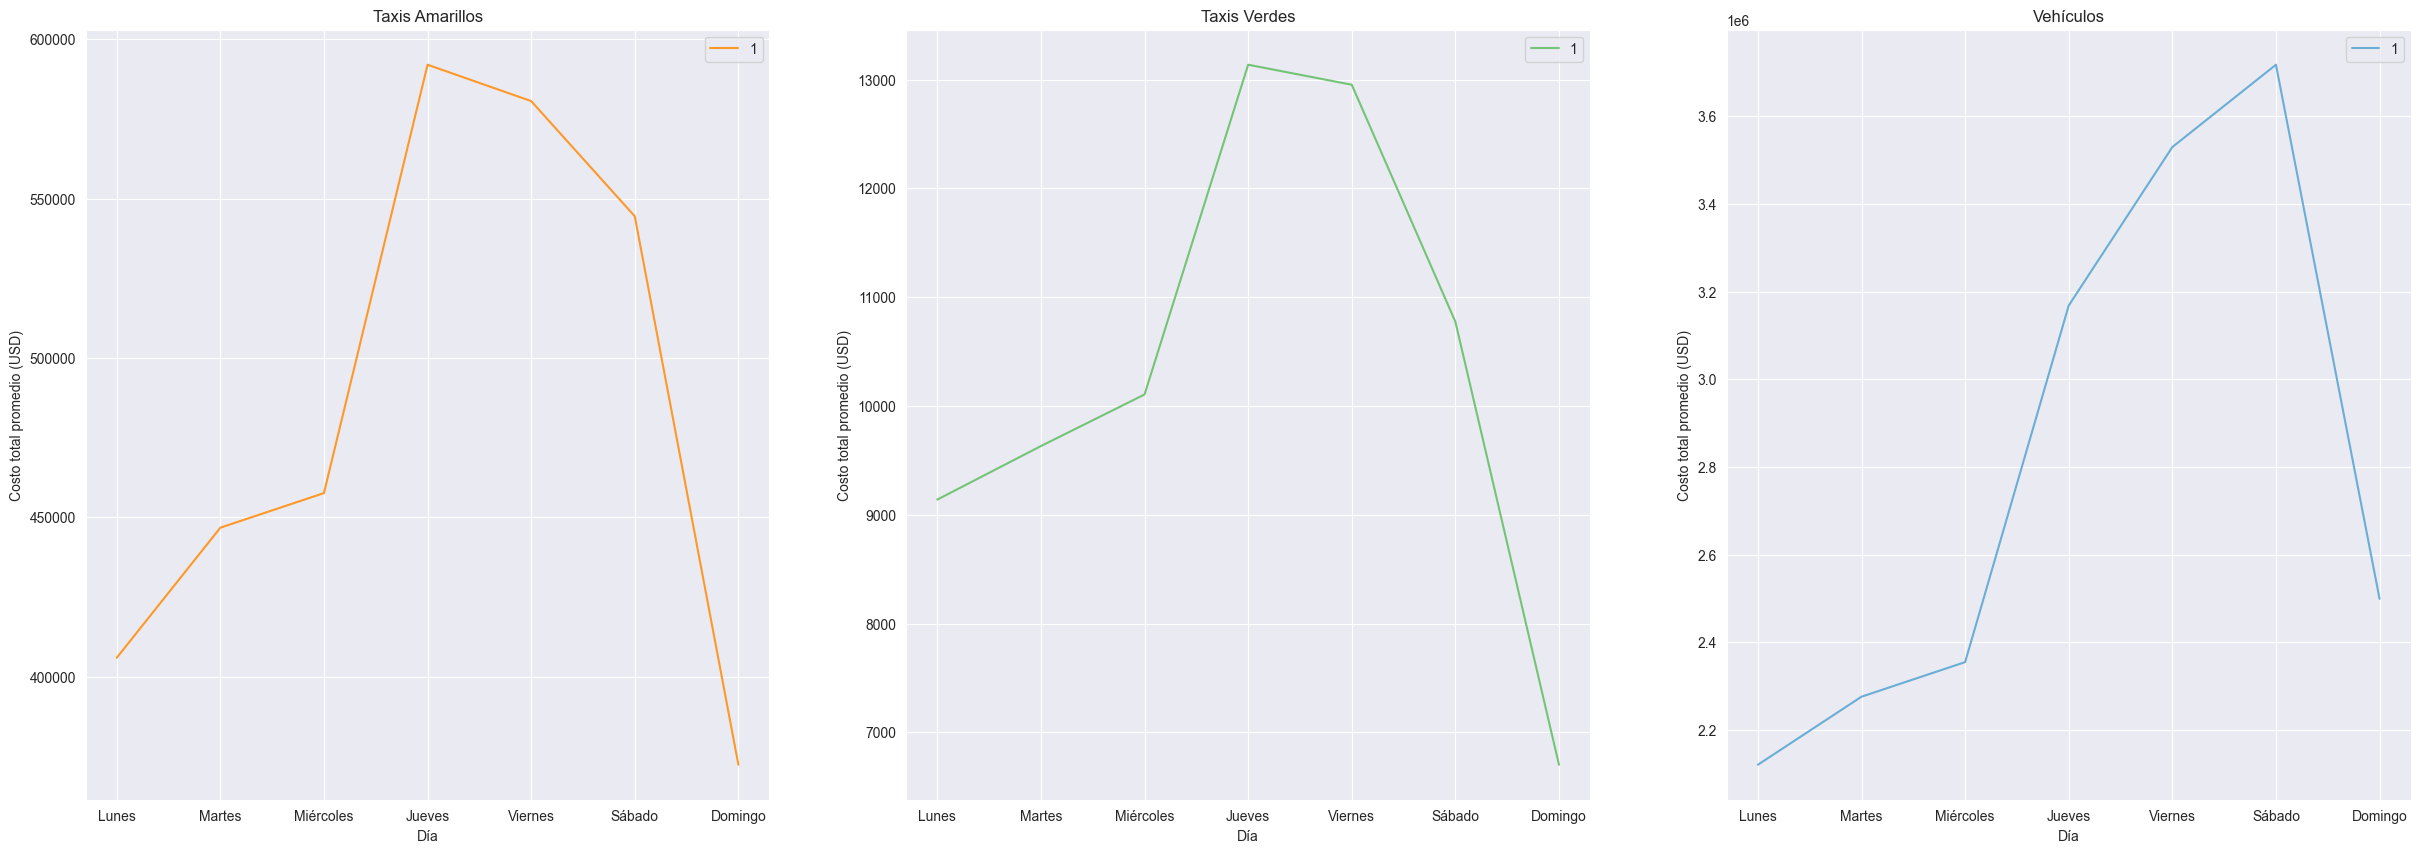

In [53]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 3, figsize = (30, 10))

sns.lineplot(
    x = y_por_semana.index,
    y = 'total_amount',
    data = y_por_semana,
    ax = ax[0], 
    hue = 1,
    palette = 'YlOrBr'
)
ax[0].set_xlabel('Día')
ax[0].set_ylabel('Costo total promedio (USD)')
ax[0].set_title('Taxis Amarillos')

sns.lineplot(
    x = g_por_semana.index,
    y = 'total_amount',
    data = g_por_semana,
    ax = ax[1],
    hue = 1,
    palette = 'Greens'
)
ax[1].set_xlabel('Día')
ax[1].set_ylabel('Costo total promedio (USD)')
ax[1].set_title('Taxis Verdes')

sns.lineplot(
    x = f_por_semana.index,
    y = 'total_amount',
    data = f_por_semana,
    ax = ax[2],
    hue = 1,
    palette = 'Blues'
)
ax[2].set_xlabel('Día')
ax[2].set_ylabel('Costo total promedio (USD)')
ax[2].set_title('Vehículos')

plt.show()

## Matriz de correlación

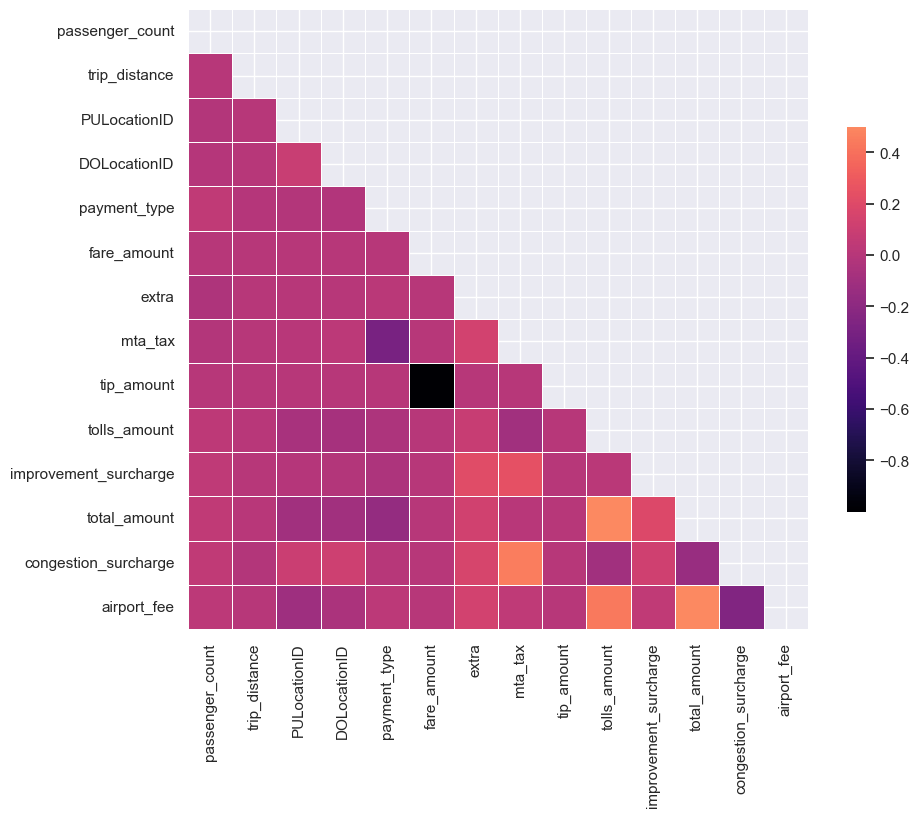

In [57]:
#Correlación taxis amarillos.
sns.set_theme(style = 'darkgrid')

ycorr = yellow_2022_13[['passenger_count',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
]].corr()
mask = np.triu(np.ones_like(ycorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(ycorr, mask = mask, cmap = 'magma', vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Relación inversamente proporcional entre el costo del viaje base (calculado al inicio) y la cantidad de propina dejada por el cliente.
* Las correlaciones más altas (0.4+) las da:
    - Costo total del viaje (total_amount) vs. peajes (tolls_amount).
    - Recargo de congestion (congestion_surcharge) vs. Impuesto MTA.
    - Tasa por aeropuerto vs. peajes.
    - Costo total del viaje vs. Tasa por aeropuerto.


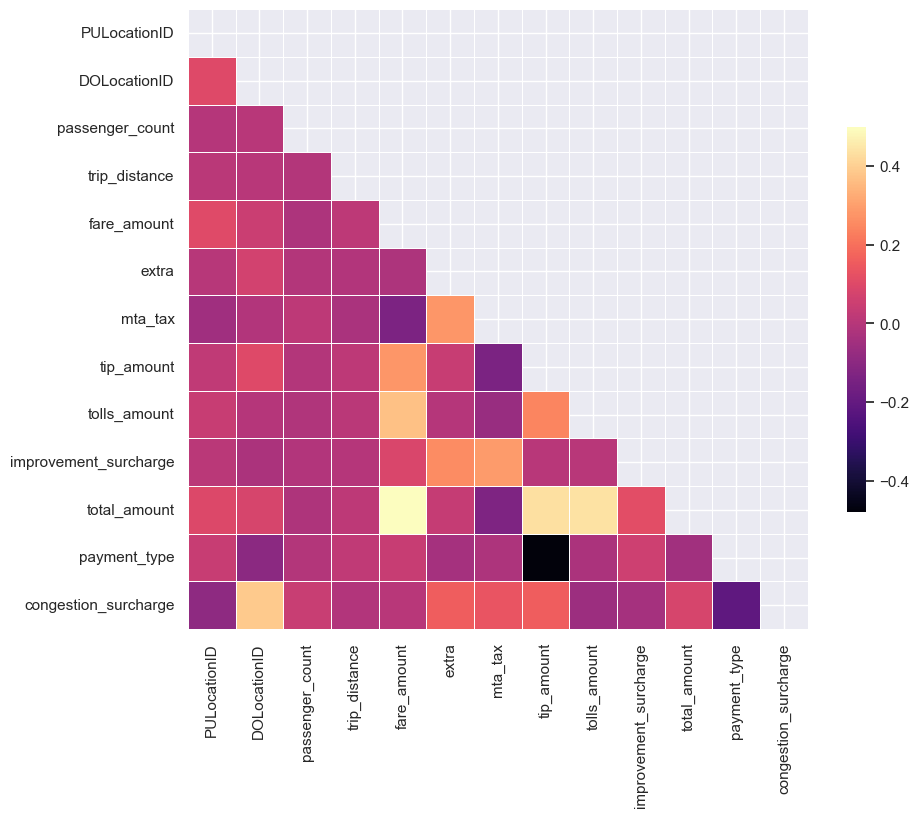

In [58]:
#Correlación taxis verdes.
sns.set_theme(style = 'darkgrid')

gcorr = green_2022_13[['PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'congestion_surcharge',
]].corr()
mask = np.triu(np.ones_like(gcorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(gcorr, mask = mask, cmap = 'magma', vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Relación inversamente proporcional entre tipo de pago y cantidad de propina.
* Las correlaciones más altas las da (0.4+):
    - Zona donde el taxímetro para al final del viaje (DOLocationID) vs. Recargo de congestión.
    - Peaje (tolls_amount) vs. cobro base.
    - Cobro total vs. cantidad de propina.
    - Cobro total vs. Peaje.
    - Cobro total vs. Cobro base.

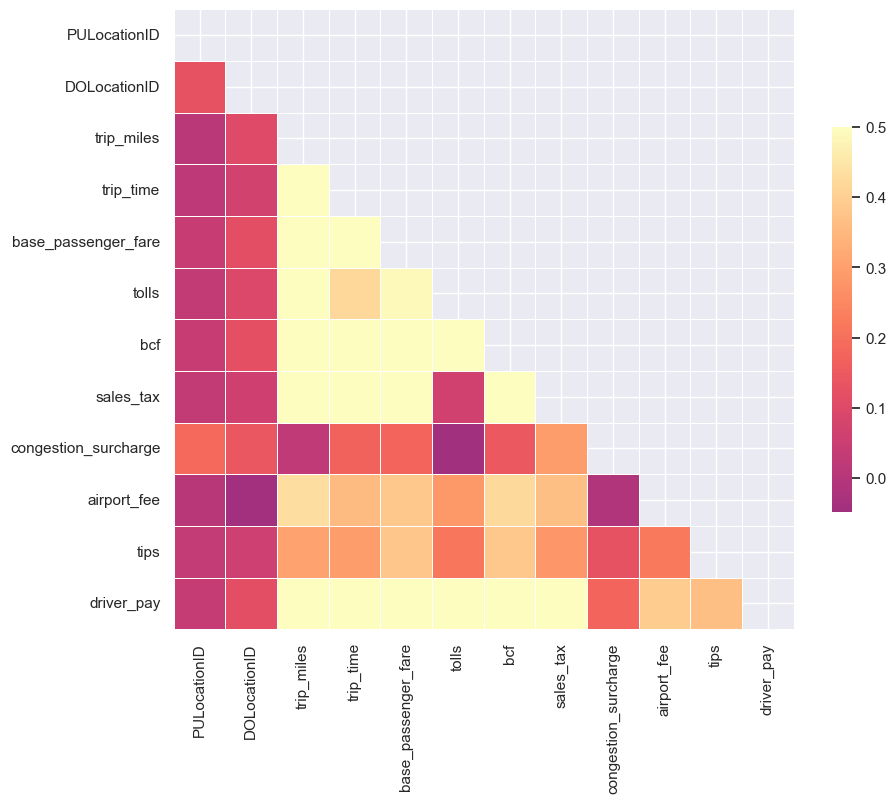

In [59]:
#Correlación vehículos en renta.
sns.set_theme(style = 'darkgrid')

fcorr = fhv_2022_13[['PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay'
 ]].corr()
mask = np.triu(np.ones_like(fcorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(fcorr, mask = mask, cmap = 'magma', vmax = 0.5, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

plt.show()

* Correlaciones más altas:
    - Millas de viaje vs. tiempo de viaje.
    - Millas de viaje vs. Cobro base.
    - Millas de viaje vs. peaje.
    - Millas de viaje vs. colecta para Black Car Fund (bcf).
    - Millas de viaje vs. Impuesto de venta (sales_tax).
    - Tiempo de viaje vs. Pago del conductor.
    - Tiempo de viaje vs. Impuesto de venta.
    - Tiempo de viaje vs. colecta para Black Car Fund (bcf).
    - Tiempo de viaje vs. Cobro base.
    - Cobro base vs. pago al conductor.
    - Cobro base vs. impuesto de venta.
    - Cobro base vs. colecta para Black Car Fund (bcf).
    - Cobro base vs. Peaje.
    - Peaje vs. colecta para Black Car Fund (bcf).
    - Peaje vs. pago al conductor.
    - Colecta para Black Car Fund (bcf) vs.
    - Impuesto de venta vs. pago al conductor.

Pago al conductor para vehículos en renta parece ser dependiente o estar relacionado altamente con el tiempo de viaje, el cobro base y el impuesto de venta. A su vez estos estan correlacionados con otros factores.